In [357]:
import numpy as np

In [358]:
all_participants = np.load('../datasets/topicos_cc/s_t_features.npy')
all_participants.shape

(10, 792, 40)

In [359]:
dataX = all_participants[9]
dataX.shape

(792, 40)

In [360]:
X = participant
pattern = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.repeat(pattern, 99, axis=None)
y = np.array(y).flatten()

X.shape, y.shape

((792, 40), (792,))

In [361]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [362]:
def plotPcaScatter(X):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import seaborn as sns

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Configuração do tamanho do gráfico scatterplot 
    axs[0, 0].remove()  # remove o subplot em [0, 0]
    axs[0, 1].remove()  # remove o subplot em [0, 1]
    ax1 = fig.add_subplot(2, 1, 1)  # adiciona um subplot maior no topo

    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1', ax=ax1)
    ax1.set_title('Scatter plot of the 2 principal components')

    axs[1, 0].bar(np.arange(1, X.shape[1] + 1), pca.components_[0])
    axs[1, 0].set_xlabel('Features')
    axs[1, 0].set_ylabel('Loading no Primeiro Componente Principal')
    axs[1, 0].set_title('PCA 1')

    axs[1, 1].bar(np.arange(1, X.shape[1] + 1), pca.components_[1])
    axs[1, 1].set_xlabel('Features')
    axs[1, 1].set_ylabel('Loading no Segundo Componente Principal')
    axs[1, 1].set_title('PCA 2')

    plt.tight_layout()
    plt.show()


In [363]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func=f_classif, k=30)
# selector = SelectPercentile(score_func=f_classif, percentile=50)
# selector = GenericUnivariateSelect(score_func=f_classif, mode='k_best', param=8)
fit = selector.fit(X, y)

X_selected_features = fit.transform(X)

X_selected_features.shape

(792, 30)

Original features:  40


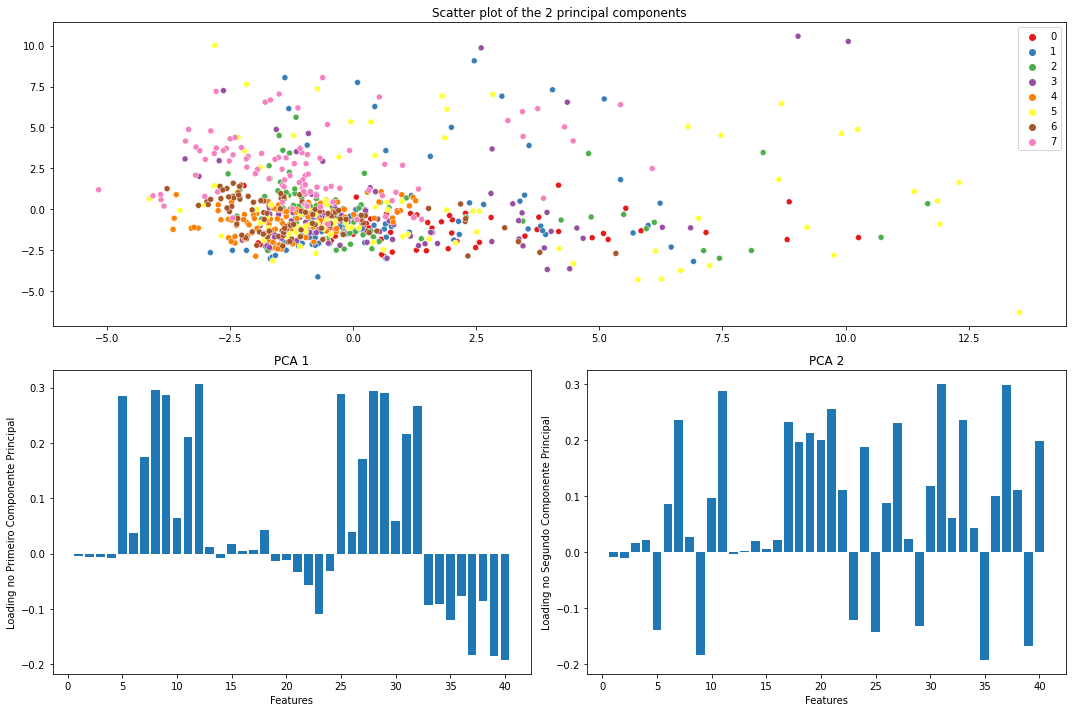

Selected features:  30


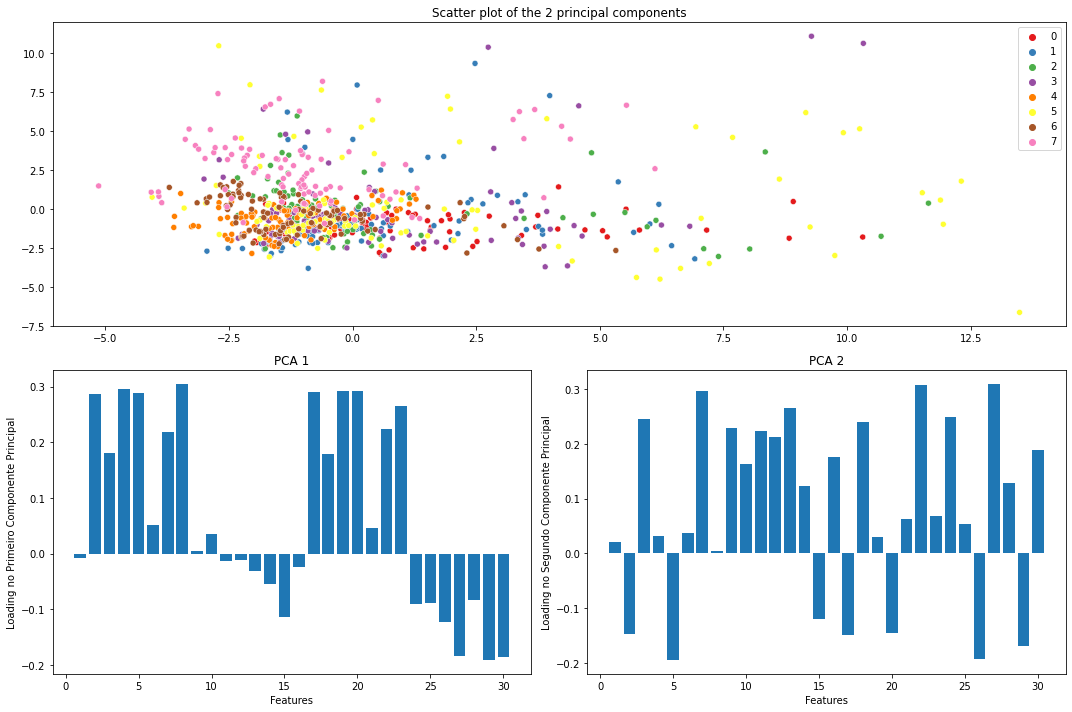

In [364]:
print('Original features: ', X.shape[1])
plotPcaScatter(X)

print('Selected features: ', X_selected_features.shape[1])
plotPcaScatter(X_selected_features)

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.3, shuffle=True)

In [366]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [367]:
from sklearn.metrics import classification_report

res = clf.predict(X_test)

print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55        34
           1       0.84      0.84      0.84        31
           2       0.37      0.50      0.43        26
           3       0.37      0.35      0.36        31
           4       0.37      0.54      0.44        24
           5       0.57      0.46      0.51        26
           6       0.86      0.75      0.80        32
           7       0.76      0.76      0.76        34

    accuracy                           0.59       238
   macro avg       0.60      0.59      0.59       238
weighted avg       0.62      0.59      0.60       238



In [368]:
from sklearn.model_selection import GridSearchCV

def optimize_svm_hyperparameters(X_train, y_train, n_jobs=-1):
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}

    grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=n_jobs)
    grid_search.fit(X_train, y_train)

    return grid_search


In [369]:
grid_search = optimize_svm_hyperparameters(X_train, y_train)
print("Melhores parâmetros: ", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores parâmetros:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [370]:
res = grid_search.predict(X_test)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        34
           1       0.84      0.84      0.84        31
           2       0.57      0.65      0.61        26
           3       0.54      0.48      0.51        31
           4       0.64      0.67      0.65        24
           5       0.55      0.69      0.61        26
           6       0.92      0.75      0.83        32
           7       0.84      0.62      0.71        34

    accuracy                           0.71       238
   macro avg       0.71      0.70      0.70       238
weighted avg       0.72      0.71      0.71       238

